In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 10 05:58:53 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Problem description
section 4.4 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [2]:
params = ob.fl_params(num_samples=10000, num_agents=10, size=500)

# Distributed solution

In [3]:
agents = ob.fl_agents(params)
g = ob.fl_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
x_agent, x_global = prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=50)

k=0, rel_gap=1.6767373885077049e+21, L=4.133904243507362e-18, U=6931.471805599453
k=1, rel_gap=124.86894551035567, L=55.06895904700478, U=6931.471805599453
k=2, rel_gap=44.82829892673852, L=95.83736723568485, U=4392.063514028581
k=3, rel_gap=18.19193744630305, L=150.55200127771135, U=2889.3845909375736
k=4, rel_gap=7.623712554936376, L=227.41479026044235, U=1961.1597819471992
k=5, rel_gap=3.907464689759146, L=287.801947926783, U=1412.377897094588
k=6, rel_gap=3.0821183991618315, L=345.99140911360803, U=1412.377897094588
k=7, rel_gap=2.0500891318718315, L=372.7382605884197, U=1136.8849176535496
k=8, rel_gap=1.6502448312465605, L=428.97354397208954, U=1136.8849176535496
k=9, rel_gap=1.3912797551938705, L=475.42949133585495, U=1136.8849176535496
k=10, rel_gap=1.1201270139050947, L=492.28116961096885, U=1043.6986061290108
k=11, rel_gap=0.9708421945865376, L=529.5698503897559, U=1043.6986061290108
k=12, rel_gap=0.773091061859789, L=566.987444421577, U=1005.3203698906221
k=13, rel_gap=0.6112

# Centralized solution

In [5]:
x_cvx, prob_cvx, h_cvx = ob.cvx_federated_learning(params=params)

In [6]:
h_cvx, prob.upper_bnd[-1]

(926.734874833103, 927.9644822127584)

# Plot

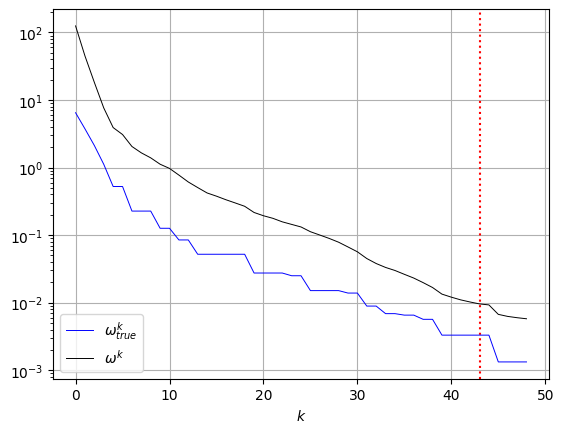

In [7]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx)